LOAD THE DATASET


In [2]:
import pandas as pd
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')


EXPLORE THE DATSET


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


HANDLING MISSING VALUES

In [6]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [8]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)


EXPOLARATORY DATA ANAYSIS(EDA)


In [9]:
survival_rate = titanic_df['Survived'].mean()
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
gender_survival = titanic_df.groupby('Sex_male')['Survived'].mean()


AGE DISTRIBUTION


<Axes: xlabel='Age', ylabel='Count'>

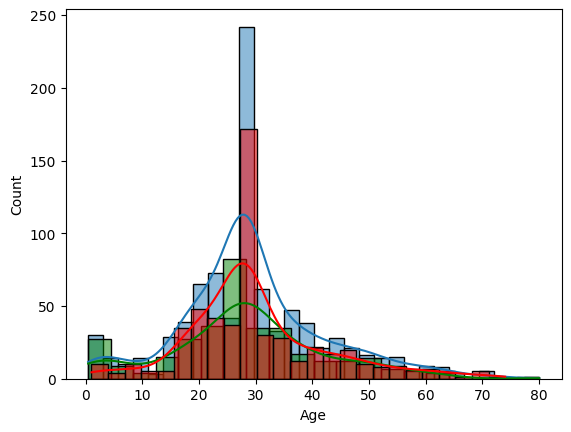

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic_df['Age'], kde=True)
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], kde=True, color='green')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], kde=True, color='red')


FARE DISTRIBUTION

<Axes: xlabel='Fare', ylabel='Count'>

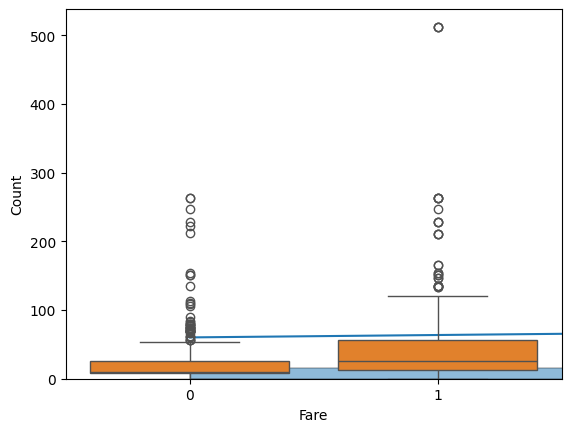

In [11]:
sns.histplot(titanic_df['Fare'], kde=True)
sns.boxplot(x='Survived', y='Fare', data=titanic_df)


FAMILY ANALYSIS


<Axes: xlabel='FamilySize', ylabel='Survived'>

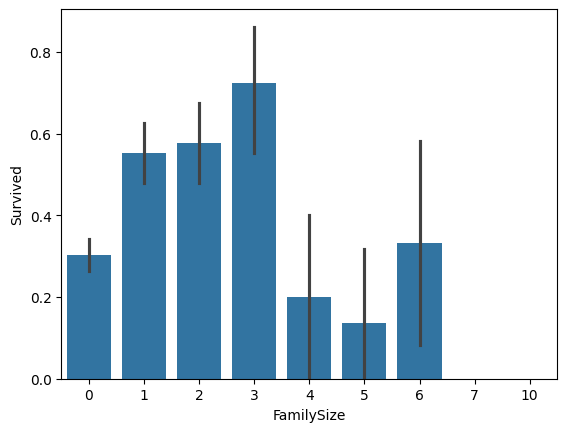

In [12]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)


CABIN ANALYSIS


<Axes: xlabel='Cabin', ylabel='Survived'>

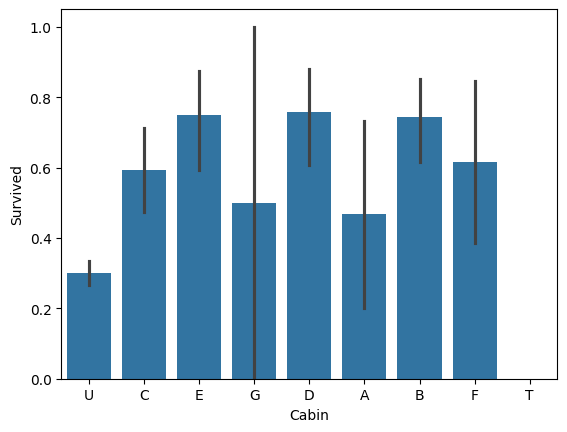

In [13]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
sns.barplot(x='Cabin', y='Survived', data=titanic_df)
